In [4]:
using Plots
using LaTeXStrings

In [123]:
function circ(x)
    return [x[1],x[3]+x[1]]
end 

circ (generic function with 2 methods)

##### 1.- En clase vimos el método de Euler mejorado en el que nosotros introducimos el Jacobiano de forma analítica para ser evaluado por el método de integración. Realice una función que implemente el mismo método de integración, pero en lugar de calcular el Jacobiano con una función que lo evalúa analíticamente, ahora sea calculado de manera numérica utilizando la derivación numérica.

In [127]:
#jacobiano autónomo general
function jacobiano(xi,h,func)
    
    jac=zeros(length(func(xi)),length(xi))
    
    for i in 1:length(func(xi)), j in 1:length(xi)
        
        xp1=zeros(length(xi))
        xp2=zeros(length(xi))
        for k in 1:length(xi)
            if  k==j #k==i ||
                xp1[k]=xi[j]+h
                xp2[k]=xi[j]-h
            else
                xp1[k]=xi[j]
                xp2[k]=xi[j]
            end
        end
        jac[i,j]=(func(xp1)[i]-func(xp2)[i])/(xp1[j]-xp2[j])
    end
    return jac
end

jacobiano (generic function with 1 method)

In [128]:
#jacobiano autónomo general
function jacobianotemp(xi,h,func)
    m=func(xi)
    jac=zeros(length(func(xi)),length(xi))
    for i in 1:length(func(xi)), j in 1:length(xi)
        xp1=zeros(length(xi))
        xp2=zeros(length(xi))
        for k in 1:length(xi)
            if  k==j #k==i ||
                xp1[k]=xi[j]+h
                xp2[k]=xi[j]-h
            else
                xp1[k]=xi[j]
                xp2[k]=xi[j]
            end
        end
        jac[i,j]=(func(xp1)[i]-func(xp2)[i])/(xp1[j]-xp2[j])
    end
    return jac
end

jacobianotemp (generic function with 1 method)

In [129]:
x=1,1,1
A=jacobianotemp(x,0.1,circ)

2×3 Array{Float64,2}:
 1.0  0.0  0.0
 1.0  0.0  1.0

In [130]:
function Euler_mejorado_J(edo,p_ini,t,jacob)
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        J=jacobianotemp(xi, δ ,edo)
        sol[i+1,:] .= sol[i,:] .+ δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i]) *edo(sol[i,:],t[i])) # ojo sistema autonomo
    end
    return sol
end

Euler_mejorado_J (generic function with 2 methods)

In [119]:
function Euler_mejorado_Jp(edo,p_ini,t,jacob)
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        xi=[i for i in sol[i,:]]
        push!(xi,t[i])
        J=jacobianotemp(xi,h,func)
        eval_edo=[sol[1,:],t[i]]
        if length(eval_edo)==lenght(p_ini)
            sol[i+1,:] .= sol[i,:] .+δ .*eval_edo
        else 
            sol[i+1,:] .= sol[i,:] .+ δ .*edo[1:(end-1)]

        sol[i+1,:] .+= 0.5*(δ^2) .*(J*edo(sol[i,:],t[i])) # ojo sistema autonomo
        end
    return sol
end

LoadError: syntax: incomplete: "function" at In[119]:1 requires end

### 2.- Utilizando los integradores de Euler mejorado con Jacobiano analítico, Euler mejorado con Jacobiano numérico, Runge-Kutta de $2^{\circ}$ orden y Runge-Kutta de $4^{\circ}$ orden, encuentre un paso de integración que proporcione una precisión de $10^{−4}$ en la solución para la siguiente ecuación:

$$
\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + \cos^2{y} = e^{-t}\sin{3t}
$$

##### Con condiciones iniciales $\ddot{y}(1)=1$, $\dot{y}(1)=2$, $y(1)=1$. En particular, ¿qué sucede en en $t\in[1,2]$ y $t\in[1,2.1]$?

Transcribimos las funciones Euler mejorado con Jacobiano analítico:

In [47]:
function Euler_mejorado_J_t_p(edo,p_ini,t,jacob)
    # J y g con dependencia temporal y de parametros externos
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        eval_edo = edo(sol[i,:],t[i])
        if length(eval_edo) == length(p_ini)
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo
        else
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo[1:(end-1)]
        end
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i]) *eval_edo )
    end
    return sol
end

Euler_mejorado_J_t_p (generic function with 2 methods)

Runge-Kutta de 2do orden: 

In [54]:
function RK_2(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ)
    end
    return sol
end

RK_2 (generic function with 1 method)

Runge-Kutta de 4to orden:

In [43]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

Ahora definimos las funciones de las ecuaciones diferenciales. Para ello notemos que podemos reescribir la ecuación diferencial como un sistema de ecuaciones diferenciales:

$$
x_1=y\\
\dot{x}_1 = x_2\\
\dot{x}_2 = x_3\\
\dot{x}_3 = -x_3^2 + 3x_2^3 - \cos^2{(x_1)} + e^{-t}\sin{(3t)}
$$

Y cuyas condiciones iniciales son: $x_1(1)=1$, $x_2(1)=2$ y $x_3(1)=1$. Las cuales, podemos escribir en una función de la siguiente manera:

In [49]:
function EDO1(vec,t)
    # vec = [x1, x2, x3]
    dx1 = vec[2]
    dx2 = vec[3]
    dx3 = -vec[3]*vec[3] + 3*vec[2]*vec[2]*vec[2] - cos(vec[1])*cos(vec[1]) + exp(-t)*sin(3*t)
    return [dx1,dx2,dx3,1.0]
end

EDO1 (generic function with 1 method)

Y ahora definimos su Jacobiano analítico

In [45]:
function EDO1_J(vec,t)
    # vec = [x1, x2, x3]
    J = zeros(3,4)
    J[1,2] = 1.0
    J[2,3] = 1.0
    J[3,1] = 2*cos(vec[1])*sin(vec[1])
    J[3,2] = 9*vec[2]*vec[2]
    J[3,3] = -2*vec[3]
    J[3,4] = 3*exp(-1*t)*cos(3*t)-exp(-1*t)*sin(3*t)
    return J
end

EDO1_J (generic function with 1 method)

Ahora resolvamos esta ecuación diferencial con los diversos métodos en t=[1,2], para obtener un error de menos de 10^{-4}

#### 3.- Modifique las funciones integradoras que programamos en clase (Euler mejorado, Runge-Kutta de $2^{\circ}$ orden y Runge-Kutta de $4^{\circ}$ orden) para que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial

$$
\ddot{x} + \frac{1}{10}\dot{x}+4\sin{x} = \frac{1}{2}\sin{(\omega t)}
$$

#### Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=1$ y para $\omega\in\{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado. La solución debe tener una precisión de por lo menos $10^{−5}$.

Notemos que podemos escribir la ecuación diferencial como un sistema de ecuaciones diferenciales donde:
$$
x=x_1\\
\dot{x}_1 = x_2\\
\dot{x}_2 = -\frac{1}{10}x_2 - 4\sin{(x_1)} + \frac{1}{2}\sin{(\omega t)}
$$
Ahora escribamos este sistema como una función en Julia y su jacobiano de manera analítica.

In [152]:
function EDO2(vec,t,ω)
    # vec = [x1, x2]
    dx1 = vec[2]
    dx2 = -vec[2]/10 - 4*sin(vec[1]) + 0.5*sin(ω*t)
    return [dx1,dx2]#1.0]
end

EDO2 (generic function with 2 methods)

Ahora el jacobiano analítico:

In [155]:
function EDO2_J(vec,t,ω)
    # param = [ omega ]
    # vec = [x1, x2]
    #ω = param
    J = zeros(length(vec),length(vec)+1)
    J[1,2] = 1.0
    J[2,1] = -4*cos(vec[1])
    J[2,2] = -1/10
    J[2,3] = 0.5*ω*cos(ω*t)
    return J
end

EDO2_J (generic function with 1 method)

Ahora modifiquemos las funciones de Euler mejorado:

In [159]:
function Euler_mejorado_J(edo,p_ini,t,jacob,ω)
    # J y g con dependencia temporal y de parametros externos
    sol = zeros(length(t),length(p_ini))
    sol[1,:] = p_ini
    δ = t[2]-t[1]
    for i in 1:(length(t)-1)
        eval_edo = edo(sol[i,:],t[i],ω)
        if length(eval_edo) == length(p_ini)
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo
        else
            sol[i+1,:] .= sol[i,:] .+ δ .*eval_edo[1:(end-1)]
        end
        sol[i+1,:] .+= 0.5*(δ^2) .*(jacob(sol[i,:],t[i],ω) *eval_edo )
    end
    return sol
end

Euler_mejorado_J (generic function with 2 methods)

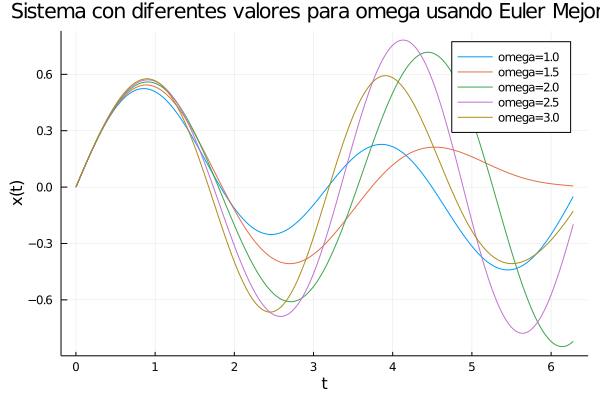

In [163]:
plot(title="Sistema con diferentes valores para omega usando Euler Mejorado",xlabel="t",ylabel="x(t)")
tiempo = collect(0:0.01:2π)
omegas = collect(1:0.5:3) #tomamos solamente 5 valores de ω
for ω in omegas
    solucion = Euler_mejorado_J(EDO2,[0,1],tiempo,EDO2_J,ω)
    plot!(tiempo,solucion[:,1],label ="omega=$(ω)", lw=1.0)
end
plot!()

In [168]:
function RK_2_1(edo,x_ini,t,ω)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i],ω) #solo agregamos un param para que no haya problemas de matcheo
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ,ω)
    end
    return sol
end

RK_2_1 (generic function with 1 method)

In [175]:
plot(title="Sistema con diferentes valores para omega usando Euler Mejorado",xlabel="t",ylabel="x(t)")
tiempo = collect(0:0.01:2π)
omegas = collect(1:0.5:3) #tomamos solamente 5 valores de ω
for ω in omegas
    solucion = RK_2_1(EDO2,[0.0,1.0],tiempo,ω)
    plot!(tiempo,solucion[:,1],label ="omega=$(ω)", lw=1.0)
end
plot!()

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 2 and 3")

In [134]:
function RK_4_1(edo,x_ini,t,ω)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i],ω)
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ,ω)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ,ω)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ,ω)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4_1 (generic function with 1 method)

Entonces resolvamos el sistema con las condiciones dadas y para diversas omegas, para ello, encontremos el espacio en nuestra malla para que nos de un error menor a 10^{-5}